In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20) #Changes the default size of plotted figures.

We started with a simple 2 body orbit. Now we try to work in another body into the mix.

Special credit to GitHub user Morgan-W for their assistance in debugging this program.

In [33]:
#G = 6.674 * 10 ** (-11) * (3600 * 24) ** 2 #m^3 kg^-1 day^-2
G = 6.674 * 10 ** (-11) * (3600 ** 2) #m^3 kg^-1 hr^-2
#G = 6.674 * 10 ** (-11) ##m^3 kg^-1 s^-2

#Standard Distance Equation
def calc_distance(x_position_1 = 0, y_position_1 = 0, x_position_2 = 0, y_position_2 = 0): 
    R = np.sqrt((x_position_1 - x_position_2)**2 + (y_position_1 - y_position_2)**2)
    return R
#Newtonian equations of motion for velocity and position.
def update_velocity(velocity, acceleration, timestep):
    new_velocity = velocity + (acceleration * timestep)
    return new_velocity
def update_position(x, y, v_x, v_y, timestep):
    new_x = x + v_x*timestep
    new_y = y + v_y*timestep
    return new_x, new_y
def calculate_accelerations(bodies):
    x_accelerations = []
    y_accelerations = []
    for orbitting_body in bodies:
        x_accel = 0
        y_accel = 0
        for central_body in bodies:
            if central_body != orbitting_body:
                R = calc_distance(central_body.x_position, central_body.y_position, orbitting_body.x_position, orbitting_body.y_position)
                x_accel += -G * central_body.mass * np.abs(R ** (-3)) * (-central_body.x_position + orbitting_body.x_position)
                y_accel += -G * central_body.mass * np.abs(R ** (-3)) * (-central_body.y_position + orbitting_body.y_position)
        x_accelerations.append(x_accel)
        y_accelerations.append(y_accel)
    return x_accelerations, y_accelerations

#The heart of the simulation.

#def calculate_step(bodies, t = 1):
#    x_accelerations, y_accelerations = calculate_accelerations(bodies)
#    for i in range(0, len(bodies)):
#        bodies[i].x_velocity = update_velocity(bodies[i].x_velocity, x_accelerations[i], t)
#        bodies[i].y_velocity = update_velocity(bodies[i].y_velocity, y_accelerations[i], t)
#    for i in range(0, len(bodies)):
#        bodies[i].x_position, bodies[i].y_position = update_position(bodies[i].x_position, bodies[i].y_position, bodies[i].x_velocity, bodies[i].y_velocity, t)        
#    return

def calculate_step(bodies, t=1):
    for i in range(0, len(bodies)):
        bodies[i].x_position, bodies[i].y_position = update_position(bodies[i].x_position, bodies[i].y_position, bodies[i].x_velocity, bodies[i].y_velocity, t)
    x_accelerations, y_accelerations = calculate_accelerations(bodies)
    for i in range(0, len(bodies)):
        bodies[i].x_velocity = update_velocity(bodies[i].x_velocity, x_accelerations[i], t)
        bodies[i].y_velocity = update_velocity(bodies[i].y_velocity, y_accelerations[i], t)
    return
        
class body:
    global G
    def __init__(self, name, mass, x_position, y_position, x_velocity, y_velocity):
        self.name = name
        self.mass = mass
        self.x_position = x_position
        self.y_position = y_position
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity
        


In [34]:
#Initial Conditions Values taken from NASA's fact sheets on solar system bodies
#https://nssdc.gsfc.nasa.gov/planetary/planetfact.html

M1 = 1.9091 * 10 ** 30 #kg #solar mass
M2 = 5.9724 * 10 ** 24 #kg #earth mass
M3 = 6.4171 * 10 ** 23 #kg #mars mass
M4 = 3.3011 * 10 ** 23 #kg #mercury mass
M5 = 4.8675 * 10 ** 24 #kg #venus mass

v_earth = (30.29 * 10 ** 3) * 3600# m/hr
x_earth = 147.09 * 10 ** 9 #m at perihelion
y_earth = 0.0 #m

v_mars = (26.5 * 10 ** 3) * 3600 #m/hr
x_mars = 206.62 * 10 ** 9 #m at perihelion
y_mars = 0.0 #m

v_mercury = (58.98 * 10 ** 3) * 3600 #m/hr
x_mercury = 46.0 * 10 ** 9 #m at perihelion
y_mercury = 0.0 #m

v_venus = (35.26 * 10 ** 3) * 3600 #m/hr
x_venus = 107.48 * 10 ** 9 #m at perihelion
y_venus = 0.0 #m

Sun = body("Sun", M1, 0.0, 0.0, 0.0, 0.0)
Earth = body("Earth", M2, x_earth, y_earth, 0.0, v_earth)
Mars = body("Mars", M3, x_mars, y_mars, 0.0, v_mars)
Mercury = body("Mercury", M4, x_mercury, y_mercury, 0.0, v_mercury)
Venus = body("Venus", M5, x_venus, y_venus, 0.0, v_venus)
bodies = [Sun, Earth, Mars, Mercury, Venus]


In [35]:
#Creating arrays to store the data points to be plotted
earth_y_pos = []
earth_x_pos = []
sun_y_pos = []
sun_x_pos = []
mars_y_pos = []
mars_x_pos = []
mercury_x_pos = []
mercury_y_pos = []
venus_x_pos = []
venus_y_pos = []

#Run Simulation
for t in range(24000):
    earth_x_pos.append(Earth.x_position)
    earth_y_pos.append(Earth.y_position)
    mars_x_pos.append(Mars.x_position)
    mars_y_pos.append(Mars.y_position)
    sun_x_pos.append(Sun.x_position)
    sun_y_pos.append(Sun.y_position)
    mercury_x_pos.append(Mercury.x_position)
    mercury_y_pos.append(Mercury.y_position)
    venus_x_pos.append(Venus.x_position)
    venus_y_pos.append(Venus.y_position)
    calculate_step([Sun, Earth, Mars, Mercury, Venus])
    


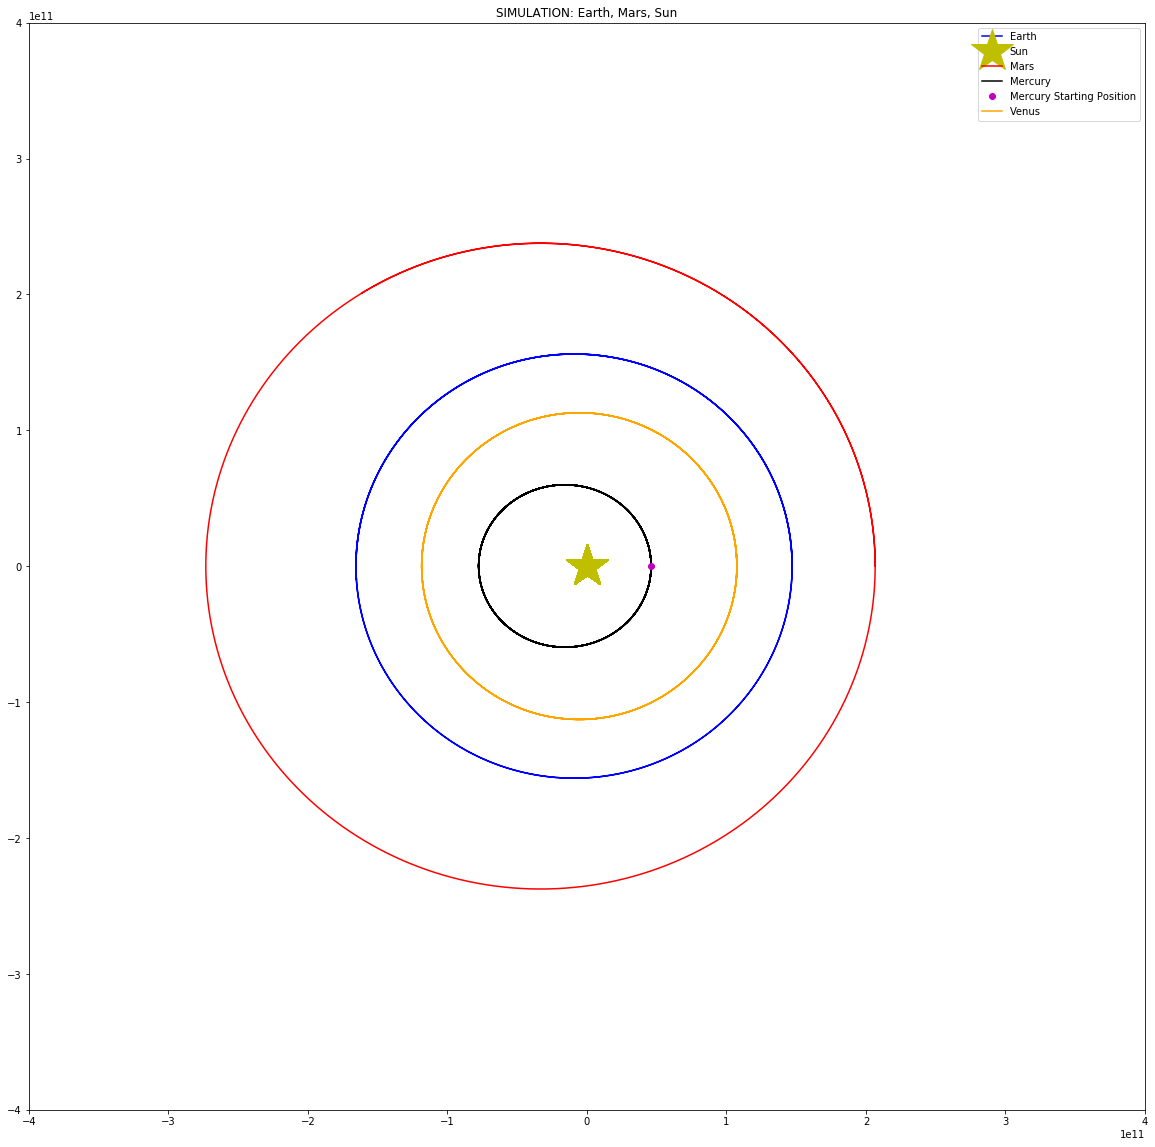

In [36]:
plt.plot(earth_x_pos, earth_y_pos, 'b-', label = "Earth")
plt.plot(sun_x_pos, sun_y_pos, 'y*', markersize = 45, label = "Sun")
plt.plot(mars_x_pos, mars_y_pos, 'r-', label = "Mars")
plt.plot(mercury_x_pos, mercury_y_pos, 'k-', label = "Mercury")
plt.plot(x_mercury, y_mercury, 'mo', label = "Mercury Starting Position")
plt.plot(venus_x_pos, venus_y_pos, color = 'orange', label = "Venus")


#Lock the Axes so it does not change with the values plotted
plt.xlim(-4 * 10 ** 11, 4 * 10**11)
plt.ylim(-4 * 10 ** 11, 4 * 10**11)
plt.legend()

plt.title("SIMULATION: Earth, Mars, Sun")

plt.show()

Above, I did an n-body simulation. As you can see, it is not perfect. Mercury's orbit seems to be decaying rapidly (on an astronomical timescale). This is an issue I am going to find a solution in. Collaborating with a fellow researcher gave me the idea that the unexpected orbits could be the result of stacked gravitational effects. After further consideration, it is also possible that the radiation pressure due to the sun could stabilize Mercury's orbit, but Mercury is slowly moving outward. Factoring in radiation pressure should exacerbate that effect, not mitigate it. Perhaps I am not accounting for its speed properly.

***Edit: It turns out, the decay was not a result of a lack of accounting for physical forces. I simply changed the order of updating position and velocity. I changed it here, in the N Body Orbit file, but I will leave it untouched in the 2 body orbit, to show the difference. The correction can be achieved either by calculating acceleration, then velocity, then position, or by calculating position, then acceleration, then velocity. The issue was a result of a "de-synchronized" acceleration being used to calculate the velocity. Put another way: the forces acting on the bodies depend heavily on their position with respect to one another. Thus, the velocity needs to be calculated after calculating the acceleration, before changing anything else. I choose to calculate the new position, then the acceleration, then the velocity because it makes physical sense. I chose the initial conditions to be at perihelion, because the max velocity of planets is well quantified (alternatively, you should be able to use aphelion and min velocity as initial conditions for the same reasons). At perihelion, the body should be travelling at maximum velocity for that instant. Thus, the new position should be calculated first, then the acceleration, then the new velocity.

I started all of the planets at their perihelion because it was simplest: I can research the maximum and miminimum orbital speeds of each planet in the solar system, but it would be too complicated for an educational exercise of this level to try and find the orbital speeds at arbitrary points in a planet's orbit. It is even more complicated to find true initial conditions, since that would mean going back billions of years to when everything was still in a protoplanetary disc.

I might try overcoming this drawback by staggering the start times of the simulations.

I thought about what it would mean to run an n-body simulation on truly an amount of bodies that would constitute an n-body amount (I know n-body means it is generalized, but I also think of it as that point when it is more work to specify the number of bodies than it's worth). For example, if I wanted to run a 24-simulation, typing out the declarations for all of the arrays and ensuring that all of the position component arrays for each of the 24 bodies would be tedious and time consuming. So... I thought: what if I had a computer code for me?

I wrote a function that automates the drudgery of the simulation. I did look up how to run a file in a Python program, because the last time I did it, I had automated writing a Javascript file for Callback code that used specialized functions to run. I included the link that I found my solution at in a comment next to the execution command. I wanted to include my reasoning for using exec instead of something else.

This was one of those situations where I did not have to worry about the security of the execution because the program created the file for its own use. Importing the file would have made no sense, because I am not calling functions from it. I want it to take existing functions and use them to run a simulation with minimal human intervention.

I included the initial conditions at the bottom so that I could compare the results from the automated simulation and the hand-typed simulation. 

In [ ]:
#Simulation Wrapper
def simulate(bodies, simulation_time, lim_low = -4 * 10 ** 11, lim_high = 4 * 10 ** 11):
    file = open("simulation.py", "w")
    for body in bodies:
        file.write(body.name + "_x_position = [] \n")
        file.write(body.name + "_y_position = [] \n")
    file.write("for t in range(0, simulation_time): \n")
    for body in bodies:
        file.write("  " + body.name + "_x_position.append(" + body.name + ".x_position) \n")
        file.write("  " + body.name + "_y_position.append(" + body.name + ".y_position) \n")
    file.write("  calculate_step([")
    for body in bodies:
        file.write(body.name + ", ")
    file.write("]) \n")
    for body in bodies:
        file.write("plt.plot(" + body.name + "_x_position, " + body.name + "_y_position, label = \"" + str(body.name) + "\") \n")
    file.write("plt.legend() \n")
    #Mandate a square field of view
    file.write("plt.xlim(" + str(lim_low) + ", " + str(lim_high) + ") \n")
    file.write("plt.ylim(" + str(lim_low) + ", " + str(lim_high) + ") \n")
    file.write("plt.show() \n")
    file.close()
    exec(open("simulation.py").read()) #Information for running programs within Python programs can be found here: https://stackoverflow.com/questions/7974849/how-can-i-make-one-python-file-run-another
    return
    

#Initial Conditions Values taken from NASA's fact sheets on solar system bodies
#https://nssdc.gsfc.nasa.gov/planetary/planetfact.html

M1 = 1.9091 * 10 ** 30 #kg #solar mass
M2 = 5.9724 * 10 ** 24 #kg #earth mass
M3 = 6.4171 * 10 ** 23 #kg #mars mass
M4 = 3.3011 * 10 ** 23 #kg #mercury mass
M5 = 4.8675 * 10 ** 24 #kg #venus mass

v_earth = (30.29 * 10 ** 3) * 3600# m/hr
x_earth = 147.09 * 10 ** 9 #m at perihelion
y_earth = 0 #m

v_mars = (26.5 * 10 ** 3) * 3600 #m/hr
x_mars = 206.62 * 10 ** 9 #m at perihelion
y_mars = 0 #m

v_mercury = (58.98 * 10 ** 3) * 3600 #m/hr
x_mercury = 46.0 * 10 ** 9 #m at perihelion
y_mercury = 0 #m

v_venus = (35.26 * 10 ** 3) * 3600 #m/hr
x_venus = 107.48 * 10 ** 9 #m at perihelion
y_venus = 0 #m

Sun = body("Sun", M1, 0, 0, 0, 0)
Earth = body("Earth", M2, x_earth, y_earth, 0, v_earth)
Mars = body("Mars", M3, x_mars, y_mars, 0, v_mars)
Mercury = body("Mercury", M4, x_mercury, y_mercury, 0, v_mercury)
Venus = body("Venus", M5, x_venus, y_venus, 0, v_venus)

bodies = [Sun, Earth, Mars, Mercury, Venus]
simulate(bodies, 24000)